In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras

## prepare data

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train/255
x_test = x_test/255

unlabeld_index = np.ones(y_train.shape, np.bool)

N = 20
for i in range(10):
  idx = np.where(y_train == i)[0][:N]
  unlabeld_index[idx] = 0

x_unlabeld = x_train[np.where(unlabeld_index)[0], ...]

x_train = x_train[np.where(~unlabeld_index)[0], ...]
y_train = y_train[np.where(~unlabeld_index)[0], ...]

170498071/170498071 [==============================] - 13s 0us/step


<ipython-input-2-ba294b58a0c2>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  unlabeld_index = np.ones(y_train.shape, np.bool)


In [3]:
x_unlabeld.shape

(49800, 32, 32, 3)

In [4]:
# examples of categorical crossentropy
cce = keras.losses.CategoricalCrossentropy()

# a labeled data from the second class
y_true = [[0, 1, 0, 0]]
y_pred = [[0.05, 0.95, 0, 0]]
print(cce(y_true, y_pred).numpy())

# an ulabeled data
y_true = [[0, 0, 0, 0]]
y_pred = [[0.05, 0.95, 0, 0]]
print(cce(y_true, y_pred).numpy())

# another ulabeled data
y_true = [[0, 0, 0, 0]]
y_pred = [[0.1, 0.4, 0.3, 0.2]]
print(cce(y_true, y_pred).numpy())

0.051293306
0.0
0.0


In [5]:
from keras.models import Model
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Lambda
from keras.layers.core import Dense
from keras.layers import Flatten
from matplotlib.pyplot import plot
from keras.layers import Input
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [7]:
del unlabeld_index

In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [9]:
model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, batch_size = 256,
                    validation_data=(x_test, y_test))

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/100
1/1 [==============================] - 9s 9s/step - loss: 2.3068 - accuracy: 0.1000 - val_loss: 2.3051 - val_accuracy: 0.0913
Epoch 2/100
1/1 [==============================] - 0s 498ms/step - loss: 2.2993 - accuracy: 0.1150 - val_loss: 2.3021 - val_accuracy: 0.1041
Epoch 3/100
1/1 [==============================] - 1s 671ms/step - loss: 2.2960 - accuracy: 0.1050 - val_loss: 2.2996 - val_accuracy: 0.1059
Epoch 4/100
1/1 [==============================] - 1s 663ms/step - loss: 2.2903 - accuracy: 0.1200 - val_loss: 2.2965 - val_accuracy: 0.1250
Epoch 5/100
1/1 [==============================] - 0s 493ms/step - loss: 2.2798 - accuracy: 0.1550 - val_loss: 2.2920 - val_accuracy: 0.1295
Epoch 6/100
1/1 [==============================] - 1s 662ms/step - loss: 2.2826 - accuracy: 0.1100 - val_loss: 2.2865 - val_accuracy: 0.1241
Epoch 7/100
1/1 [==============================] - 1s 668ms/step - loss: 2.2696 - accuracy: 0.1350 - val_loss: 2.2799 - val_accuracy: 0.1292
Epoch 8/100
1/1 

In [18]:
def plot(history, metric):
  plt.plot(history.history[metric], label=metric)
  plt.plot(history.history[f'val_{metric}'], label = f'val_{metric}')
  plt.xlabel('Epoch')
  plt.ylabel(metric)
  plt.legend(loc='lower right')

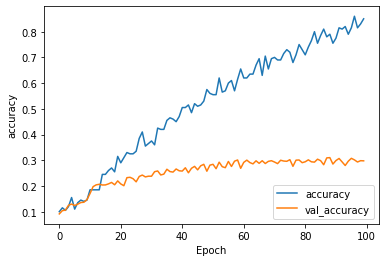

In [12]:
plot(history, 'accuracy')

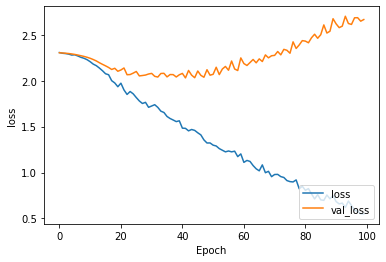

In [13]:
plot(history, 'loss')

In [7]:
x_train_0=x_unlabeld.copy()
x_train_90=np.rot90(x_unlabeld, axes=(1,2))
x_train_180=np.rot90(x_unlabeld, 2, axes=(1,2))
x_train_270=np.rot90(x_unlabeld, 3, axes=(1,2))

n = len(x_unlabeld)
y_train_0=np.full((n), 0)
y_train_90=np.full((n), 1)
y_train_180=np.full((n), 2)
y_train_270=np.full((n), 3)

In [8]:
X_train_unlabeled_full=np.concatenate((x_train_0, x_train_90, x_train_180, x_train_270), axis=0)
y_train_unlabeled_full=np.concatenate((y_train_0, y_train_90, y_train_180, y_train_270), axis=0)
y_train_unlabeled_full = keras.utils.to_categorical(y_train_unlabeled_full, num_classes=4)

In [9]:
del y_train_0, y_train_90, y_train_180, y_train_270
del x_train_0, x_train_90, x_train_180, x_train_270

In [10]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [ ]:
X_train_unlabeled_full, y_train_unlabeled_full = unison_shuffled_copies(X_train_unlabeled_full, y_train_unlabeled_full)

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(4, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [13]:
model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(X_train_unlabeled_full, y_train_unlabeled_full, epochs=10, 
                    validation_split = 0.2, batch_size = 32)

model.save('model_rotation.h5')

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10
4980/4980 [==============================] - 140s 26ms/step - loss: 1.0486 - accuracy: 0.5482 - val_loss: 0.9071 - val_accuracy: 0.6217
Epoch 2/10
4980/4980 [==============================] - 131s 26ms/step - loss: 0.9127 - accuracy: 0.6218 - val_loss: 0.8611 - val_accuracy: 0.6443
Epoch 3/10
4980/4980 [==============================] - 126s 25ms/step - loss: 0.8600 - accuracy: 0.6466 - val_loss: 0.8395 - val_accuracy: 0.6539
Epoch 4/10
4980/4980 [==============================] - 124s 25ms/step - loss: 0.8283 - accuracy: 0.6623 - val_loss: 0.8155 - val_accuracy: 0.6658
Epoch 5/10
4980/4980 [==============================] - 132s 26ms/step - loss: 0.8000 - accuracy: 0.6754 - val_loss: 0.7755 - val_accuracy: 0.6850
Epoch 6/10
4980/4980 [==============================] - 125s 25ms/step - loss: 0.7765 - accuracy: 0.6855 - val_loss: 0.7657 - val_accuracy: 0.6914
Epoch 7/10
4980/4980 [==============================] - 126s 25ms/step - loss: 0.7573 - accuracy: 0.6953 - val_loss: 0

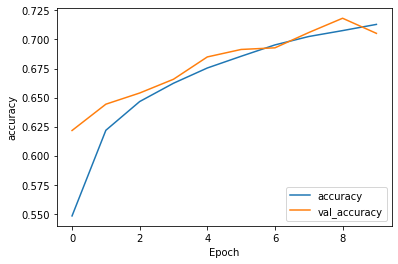

In [14]:
plot(history, 'accuracy')

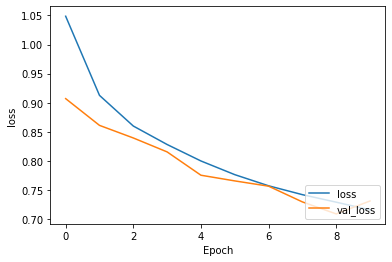

In [15]:
plot(history, 'loss')

In [9]:
model = keras.models.load_model('model_rotation.h5')
model.layers.pop()
model.add(keras.layers.Dense(10, activation='softmax',name='output_layer'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [11]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, batch_size=256,
                    validation_data=(x_test, y_test))

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/100
1/1 [==============================] - 9s 9s/step - loss: 2.2936 - accuracy: 0.1350 - val_loss: 2.3010 - val_accuracy: 0.1363
Epoch 2/100
1/1 [==============================] - 1s 674ms/step - loss: 2.2739 - accuracy: 0.1500 - val_loss: 2.2936 - val_accuracy: 0.1399
Epoch 3/100
1/1 [==============================] - 1s 576ms/step - loss: 2.2649 - accuracy: 0.1650 - val_loss: 2.2872 - val_accuracy: 0.1429
Epoch 4/100
1/1 [==============================] - 1s 673ms/step - loss: 2.2583 - accuracy: 0.1750 - val_loss: 2.2816 - val_accuracy: 0.1474
Epoch 5/100
1/1 [==============================] - 1s 569ms/step - loss: 2.2389 - accuracy: 0.1450 - val_loss: 2.2766 - val_accuracy: 0.1483
Epoch 6/100
1/1 [==============================] - 1s 669ms/step - loss: 2.2374 - accuracy: 0.1650 - val_loss: 2.2721 - val_accuracy: 0.1508
Epoch 7/100
1/1 [==============================] - 1s 667ms/step - loss: 2.2417 - accuracy: 0.1800 - val_loss: 2.2679 - val_accuracy: 0.1509
Epoch 8/100
1/1 

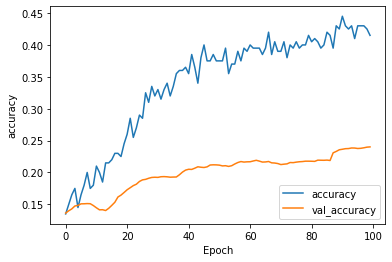

In [14]:
plot(history, 'accuracy')

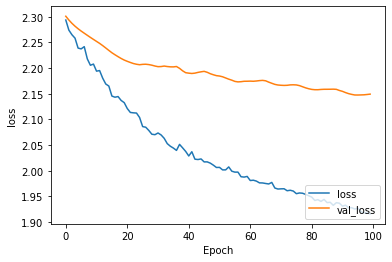

In [15]:
plot(history, 'loss')

In [8]:
input = keras.layers.Input((32, 32, 3), name='input')
general = keras.models.Sequential(
    [
      keras.layers.Conv2D(32, (3, 3), activation='relu'),
      keras.layers.MaxPooling2D((2, 2)),
      keras.layers.Dropout(0.2),
      keras.layers.Conv2D(64, (3, 3), activation='relu'),
      keras.layers.MaxPooling2D((2, 2)),
      keras.layers.Dropout(0.2),
      keras.layers.Conv2D(64, (3, 3), activation='relu'),
      keras.layers.Flatten()
    ],
    name='general'
)(input)

rotation = keras.models.Sequential(
    [
      keras.layers.Dense(64, activation='relu'),
      keras.layers.Dense(4, activation='softmax')
    ],
    name='rotation'
)(general)

classifier = keras.models.Sequential(
    [
      keras.layers.Dense(64, activation='relu'),
      keras.layers.Dense(10, activation='softmax')
    ],
    name='classifier'
)(general)
model = keras.models.Model(input, [classifier, rotation])

In [10]:
x_train_0=x_train.copy()
x_train_90=np.rot90(x_train, axes=(1,2))
x_train_180=np.rot90(x_train, 2, axes=(1,2))
x_train_270=np.rot90(x_train, 3, axes=(1,2))

In [11]:
n = len(x_train)
y_train_ssl_0=np.full((n), 0)
y_train_ssl_90=np.full((n), 1)
y_train_ssl_180=np.full((n), 2)
y_train_ssl_270=np.full((n), 3)

In [12]:
x_train1=np.concatenate((x_train_0, x_train_90, x_train_180, x_train_270), axis=0)
y_train1 = np.concatenate((y_train, y_train, y_train, y_train), axis=0)
y_train_ssl = np.concatenate((y_train_ssl_0, y_train_ssl_90, y_train_ssl_180, y_train_ssl_270), axis=0)
y_train_ssl = keras.utils.to_categorical(y_train_ssl, num_classes=4)
y_test_ssl = keras.utils.to_categorical(np.zeros((y_test.shape[0])), num_classes=4)

In [15]:
model.compile(optimizer='adam', 
              loss={
                  'classifier': 'categorical_crossentropy', 
                  'rotation': 'mse'},
              loss_weights={
                  'classifier': 1, 
                  'rotation': 1},
              metrics={
                  'classifier': 'accuracy', 
                  'rotation': 'accuracy'})

In [16]:
history = model.fit(x_train1, [y_train1, y_train_ssl], 256, 50,
          validation_data=(x_test, [y_test, y_test_ssl]))

Epoch 1/50
4/4 [==============================] - 3s 417ms/step - loss: 2.4953 - classifier_loss: 2.3067 - rotation_loss: 0.1886 - classifier_accuracy: 0.0850 - rotation_accuracy: 0.2362 - val_loss: 2.4834 - val_classifier_loss: 2.2956 - val_rotation_loss: 0.1878 - val_classifier_accuracy: 0.1354 - val_rotation_accuracy: 0.1600
Epoch 2/50
4/4 [==============================] - 1s 464ms/step - loss: 2.4777 - classifier_loss: 2.2902 - rotation_loss: 0.1875 - classifier_accuracy: 0.1363 - rotation_accuracy: 0.2788 - val_loss: 2.4753 - val_classifier_loss: 2.2802 - val_rotation_loss: 0.1951 - val_classifier_accuracy: 0.1792 - val_rotation_accuracy: 0.0000e+00
Epoch 3/50
4/4 [==============================] - 1s 460ms/step - loss: 2.4502 - classifier_loss: 2.2633 - rotation_loss: 0.1869 - classifier_accuracy: 0.1825 - rotation_accuracy: 0.2862 - val_loss: 2.4344 - val_classifier_loss: 2.2479 - val_rotation_loss: 0.1865 - val_classifier_accuracy: 0.1603 - val_rotation_accuracy: 0.0232
Epoch 

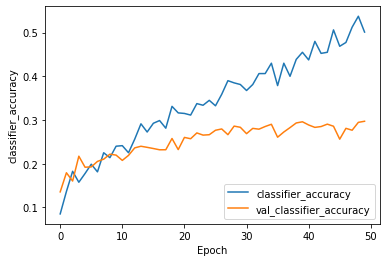

In [19]:
plot(history, 'classifier_accuracy')

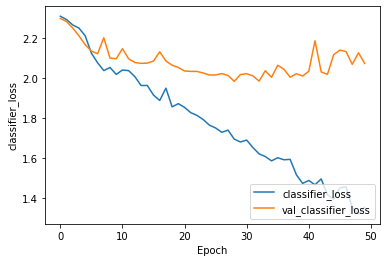

In [20]:
plot(history, 'classifier_loss')